In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [433]:
SOURCE_DIR = r'C:\Users\griffin.kowash\Documents\Projects\Cable_braids\models\Vance_k85_isolines\mesh4\100MHz'
#EFIELD_NAME = 'Field_Probe.dat'
CURRENT0_NAME = 'Wire_Current.dat'
CURRENT1_NAME = 'Bulk_Current.dat'
V_NAME = 'Wire_Voltage.dat'
dx = 0.050

In [434]:
#efield_data = np.loadtxt(SOURCE_DIR + '\\' + EFIELD_NAME)
iwire_data = np.loadtxt(SOURCE_DIR + '\\' + CURRENT0_NAME)
ibulk_data = np.loadtxt(SOURCE_DIR + '\\' + CURRENT1_NAME)
v_data = np.loadtxt(SOURCE_DIR + '\\' + V_NAME)

#et, ex, ey, ez = efield_data.T
iwiret, iwire = iwire_data.T
ibulkt, ibulk = ibulk_data.T
i = ibulk - iwire
it = iwiret
vt, v = v_data.T

#e = np.sqrt(ex**2 + ey**2 + ez**2)

In [435]:
idt = np.mean(it[1:] - it[:-1])
vdt = np.mean(vt[1:] - vt[:-1])
#efreq = np.fft.rfftfreq(efield_data.shape[0]) / dt
ifreq = np.fft.rfftfreq(it.size) / idt
vfreq = np.fft.rfftfreq(vt.size) / vdt

i_fft = np.abs(np.fft.rfft(i, norm='forward')) * 2  #sketchy factor of 2, double check (apparently it's legit)
#e_fft = np.abs(np.fft.rfft(ez, norm='forward')) * 2
v_fft = np.abs(np.fft.rfft(v, norm='forward')) * 2


Selected frequency:  100.0  MHz


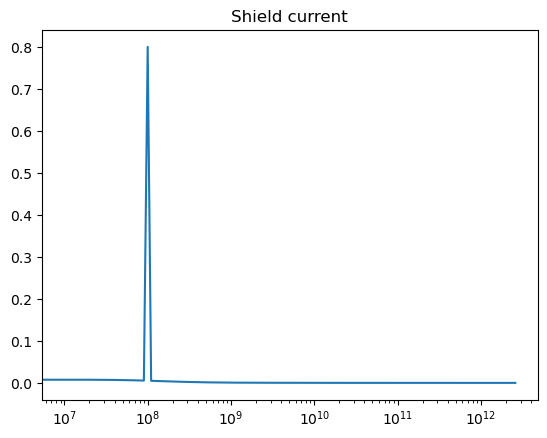

In [436]:
#plt.plot(it, i)
plt.semilogx(ifreq, i_fft)
index = np.argmax(i_fft)
plt.title('Shield current')
print('Selected frequency: ', round(ifreq[index] / 1e6, 3), ' MHz')

Text(0.5, 1.0, 'Endpoint voltage fft (V, Hz)')

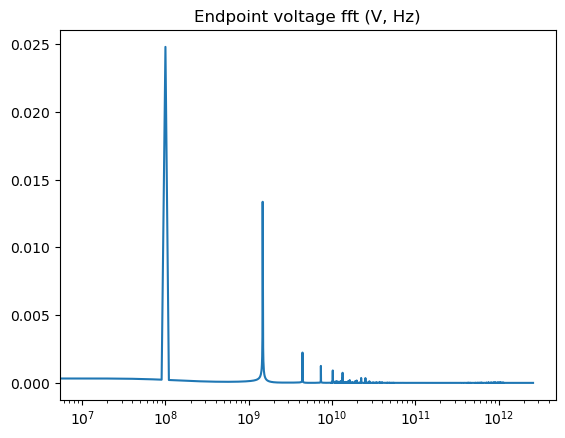

In [437]:
#plt.plot(vt, v)
plt.semilogx(vfreq, v_fft)
plt.title('Endpoint voltage fft (V, Hz)')

Text(0.5, 1.0, 'Endpoint voltage timeseries (V, s)')

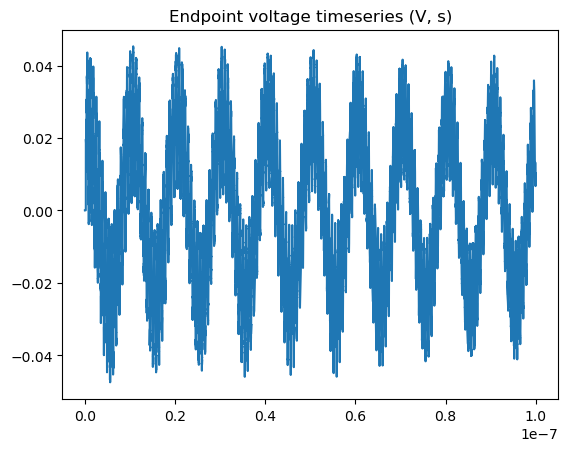

In [438]:
plt.plot(vt, v)
plt.title('Endpoint voltage timeseries (V, s)')

In [439]:
v0 = v_fft[index]
print(v0)

0.024819304403100196


In [440]:
i0 = i_fft[index]
print(i0)

0.800945647269554


In [441]:
dvdx = v0 / dx
print(dvdx)
print(dx)

0.4963860880620039
0.05


In [442]:
##### ZT OUTPUT #####
zt = dvdx / i0
print(zt)

0.6197500289241822


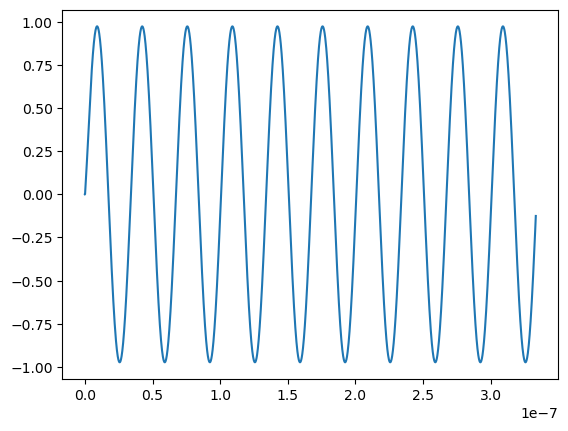

In [411]:
plt.plot(ibulkt, ibulk)

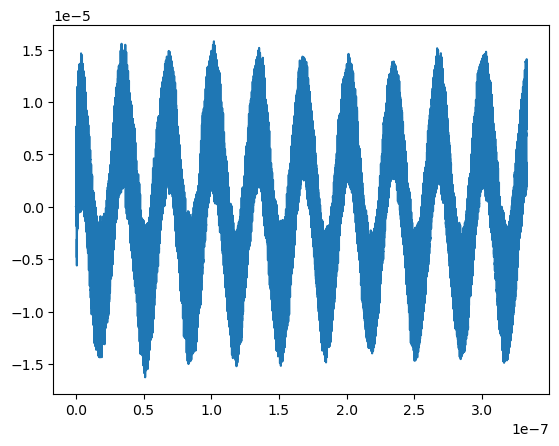

In [412]:
plt.plot(iwiret, iwire)